In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dash import Dash,html,dcc,Input,Output
import plotly.express as px

In [23]:

df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [26]:
df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Ticket           0
Embarked         0
dtype: int64

In [27]:
df.drop(columns=["Cabin"], inplace=True)

In [28]:
df["Age"].fillna(df["Age"].median(), inplace=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_20276\2097741607.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [29]:
df["Fare"].fillna(df["Fare"].median(), inplace=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_20276\3073910244.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





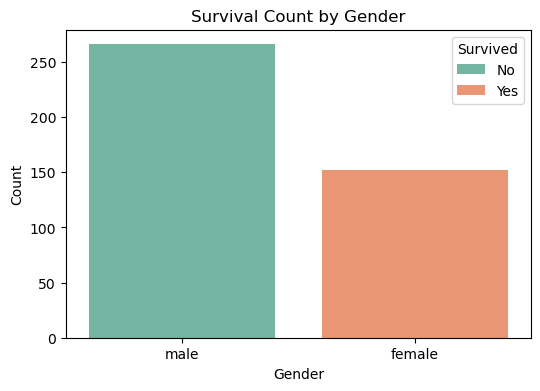

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set2")
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

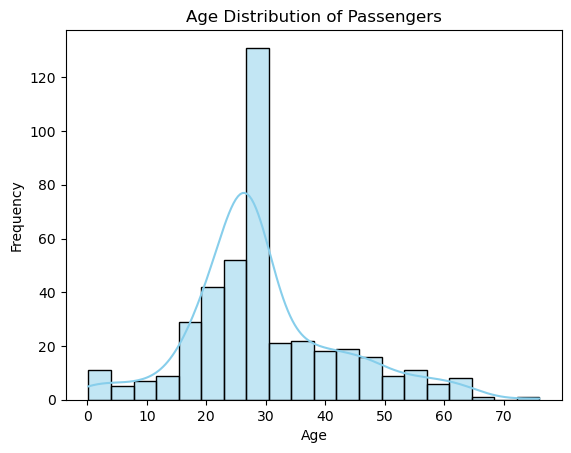

In [31]:
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_20276\2624637221.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




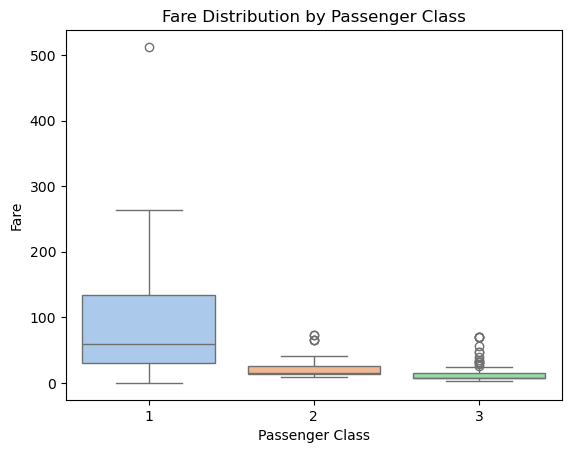

In [32]:
sns.boxplot(x="Pclass", y="Fare", data=df, palette="pastel")
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

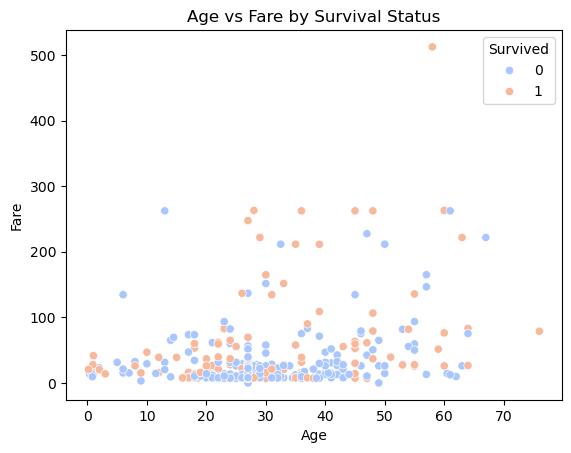

In [33]:
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, palette="coolwarm")
plt.title("Age vs Fare by Survival Status")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

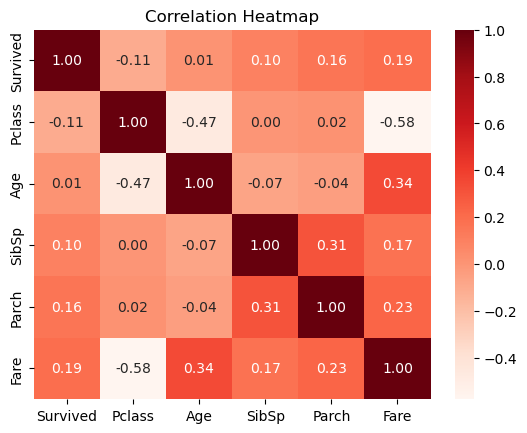

In [34]:
matrix = df[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
sns.heatmap(matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [35]:
app = Dash()

app.layout = html.Div([
    html.H1("Titanic Dashboard,",style={'color':'red'}),
    html.Label("Select type of Graph"),
    dcc.Dropdown(
        options=['Bar', 'Histogram', 'Scatter', 'Heatmap', 'Box'],
        id='plot-type',
        value='bar'
    ),
    dcc.Graph(id='graph')
])

@app.callback(
    Output('graph', 'figure'),
    Input('plot-type', 'value')
)
def update_graph(plot_type):
    if plot_type == 'Bar':
        fig = px.bar(df, x="Sex", color="Survived", barmode="group",
                     title="Survival Count by Gender")
    elif plot_type == 'Histogram':
        fig = px.histogram(df, x="Age", nbins=20, color="Survived",
                           title="Age Distribution")
    elif plot_type == 'Scatter':
        fig = px.scatter(df, x="Age", y="Fare", color="Survived",
                         title="Age vs Fare")
    elif plot_type == 'Heatmap':
        corr = df.corr(numeric_only=True)
        fig = px.imshow(corr, text_auto=True, title="Correlation Heatmap")
    elif plot_type == 'Box':
        fig = px.box(df, x="Pclass", y="Fare", color="Pclass",
                     title="Fare by Passenger Class")
    else:
        fig = px.scatter(df, x="Age", y="Fare", title="Default Scatter Plot")
    return fig

app.run(port=8850)



### **Summary of Key Findings from Titanic Visualizations**

1. **Gender & Survival**

   * Females had a **significantly higher survival rate** than males. This aligns with the "women and children first" policy during evacuation.

2. **Age Distribution**

   * Most passengers were between **20–40 years old**.
   * Survival rates for younger children were higher than for middle-aged adults.

3. **Fare & Class**

   * Passengers in **1st class** paid the highest fares and had better survival chances.
   * **3rd class** passengers had the lowest survival rates.

4. **Age vs Fare**

   * High fares were mostly paid by adults, but some children from wealthy families also appear.
   * Clear separation between passenger classes in fare amounts.

5. **Correlation Heatmap**

   * Strong correlation between **Pclass** and **Fare** (negative correlation — lower class, lower fare).
   * Survival is moderately correlated with **Fare** and **Pclass** (higher fare/class, better survival odds).
